## 6. Decision Trees and Ensemble Learning
This week, we'll talk about decision trees and tree-based ensemble algorithms.

### 6.1 Credit Risk Scoring Project
- **Dataset**: [CreditScoring Project Dataset](https://github.com/gastonstat/CreditScoring)
ring

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data cleaning and preparation
* Downloading the datase
* Re-encoding the categorical variables

Doing the train/validation/test split

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
df = pd.read_csv(data)
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


##### Data Cleaning

In [4]:
df.columns = df.columns.str.lower()

In [5]:
list(df.columns)

['status',
 'seniority',
 'home',
 'time',
 'age',
 'marital',
 'records',
 'job',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

* **status**: whether the customer managed to pay back the loan (1) or not (2)
* **seniority**: job experience in years
* **home**: type of homeownership: renting (1), a homeowner (2), and others
* **time**: period planned for the loan (in months)
* **age**: age of the client
* **marital** [status]: single (1), married (2), and others
* **records**: whether the client has any previous records: no (1), yes (2) (It’s not
clear from the dataset description what kind of records we have in this column.
For the purposes of this project, we may assume that it’s about records in the
bank’s database.)
* **job**: type of job: full-time (1), part-time (2), and others
* **expenses**: how much the client spends per month
* **income**: how much the client earns per month
* **assets**: total worth of all the assets of the client
* **debt**: amount of credit debt
* **amount**: requested amount of the loan
* **price**: price of an item the client wants to buy

#### Fix Categorical mappings

In [6]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [7]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

In [8]:
df.status = df.status.map(status_values)

In [9]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [10]:
home_values = {
    1:'rent',
    2:'owner',
    3:'private',
    4:'ignore',
    5:'parents',
    6:'other',
    0:'unk',
}

In [11]:
df.home = df.home.map(home_values)

In [13]:
df.home.value_counts()

home
owner      2107
rent        973
parents     783
other       319
private     247
ignore       20
unk           6
Name: count, dtype: int64

In [14]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

In [15]:
df.marital = df.marital.map(marital_values)

In [16]:
record_values = {
    1:'no',
    2:'yes',
    0:'unk',
}

In [17]:
df.records = df.records.map(record_values)

In [18]:
job_values = {
    1:'fixed',
    2:'parttime',
    3:'freelance',
    4:'others',
    0:'unk',
}

In [19]:
df.job = df.job.map(job_values)

In [20]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [22]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Suspicious values for max = 99999999 -> In some cases

In [24]:
df.max()

status            unk
seniority          48
home              unk
time               72
age                68
marital         widow
records           yes
job               unk
expenses          180
income       99999999
assets       99999999
debt         99999999
amount           5000
price           11140
dtype: object

In [25]:
for c in ['income','assets','debt']:
    df[c] = df[c].replace(to_replace=99999999,value=np.nan)

In [27]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [28]:
# review the status column

df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [30]:
df = df[df.status != 'unk']

In [31]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

#### Data Preparation

- Split dataset into Train, Validation, Test
- Handle missing values
- Use onehot encoding to encode categorical values
- Create a feature matrix X and target variable y

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df_train_full,df_test = train_test_split(df,test_size=0.2,random_state=11)
df_train,df_val = train_test_split(df_train_full,test_size=0.25,random_state=11)

In [36]:
len(df_train),len(df_val),len(df_test)

(2672, 891, 891)

Outcome to predict - **status**

In [37]:
y_train = df_train.status.values
y_val = df_val.status.values

In [38]:
del df_train['status']
del df_val['status']

In [39]:
# Replace missing values with Zero 

df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

##### Encode Categorical variables  - OneHot encoding

In [40]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [41]:
from sklearn.feature_extraction import DictVectorizer

In [46]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)

X_val = dv.transform(dict_val)

In [47]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=parttime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

## 6.3 Decision Trees
- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree
tree

A *decision tree* is a data structure that encodes a series of if-then-else rules. Each node in a tree contains a condition. If the condition is satisfied, we go to the right side of the tree; otherwise, we go to the left. In the end we arrive at the final decision

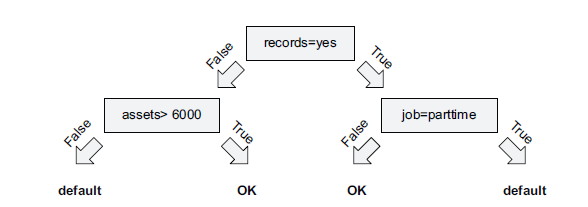

In [48]:
# Sample decision tree format in a function would be

def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'   
    

In [53]:
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [56]:
assess_risk(xi)

'ok'

##### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
from sklearn.metrics import roc_auc_score

In [64]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
auc

1.0

In [65]:
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
auc

0.6627533845147853

We just observed a case of **overfitting**. The tree learned the training data so well that it simply memorized the outcome for each customer. However, when we applied it to
the validation set, the model failed. The rules it extracted from the data turned out to
be too specific to the training set, so it worked poorly for customers it didn’t see
during training. In such cases, we say that the model cannot **generalize**.

Overfitting happens when we have a __complex model with enough power to
remember all the training data__. If we force the model to be simpler, we can make it
less powerful and improve the model’s ability to generalize.

We have multiple ways to control the complexity of a tree. One option is to restrict
its size: we can specify the max_depth parameter, which controls the maximum number
of levels.

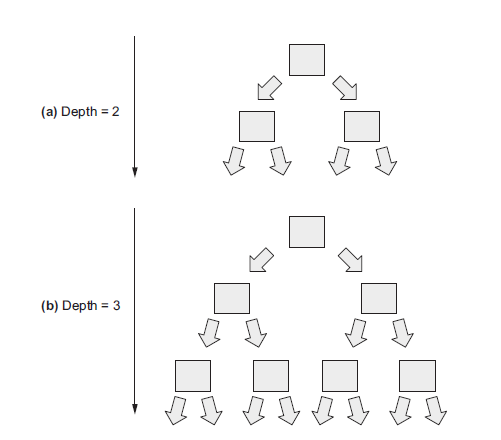

The default value for the `max_depth` parameter is None, which means that the tree can
grow as large as possible. We can try a smaller value and compare the results.

In [66]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

To visualize the tree

In [69]:
from sklearn.tree import export_text

tree_text = export_text(dt,feature_names=dv.get_feature_names_out())
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=parttime <= 0.50
|   |   |--- class: ok
|   |--- job=parttime >  0.50
|   |   |--- class: default
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: default
|   |--- seniority >  6.50
|   |   |--- class: ok



## 6.4 Decision Tree Learning Algorithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm


## 6.5 Decision Trees Parameter Tuning
- Selecting `max_depth`
- Selecting `min_samples_leaf`


## 6.6 Ensembles and Random Forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest


## 6.7 Gradient Boosting and XGBoost
- Gradient boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing XGBoost's monitoring output


## 6.8 XGBoost Parameter Tuning
- Tuning the following parameters:
  - `eta`
  - `max_depth`
  - `min_child_weight`


## 6.9 Selecting the Final Model
- Choosing between XGBoost, Random Forest, and Decision Tree
- Training the final model
- Saving the model


## 6.10 Summary
- **Decision Trees** learn if-then-else rules from data.
  - Finding the best split: selects the least impure split. This algorithm can overfit, which is controlled by limiting the max depth and the size of the groups.
- **Random Forest** combines multiple decision trees to make predictions. A diverse set of models is needed for accurate predictions.
- **Gradient Boosting** trains models sequentially, with each model attempting to correct the errors of the previous one. **XGBoost** is an optimized implementation of gradient boosting.

## 6.11 Explore More
- **EDA and Feature Engineering**: For this dataset, we skipped Exploratory Data Analysis (EDA) and feature engineering, which could provide additional insights.
- **Random Forest Tuning**: Beyond the basic parameters, consider tuning `max_features` and `bootstrap`.
- **Extra Trees**: This "extremely randomized trees" approach selects a few thresholds randomly instead of the best one, which prevents overfitting. It is implemented in Scikit-Learn as `ExtraTreesClassifier`. Try it in this project.
- **Handling NAs in XGBoost**: XGBoost can handle missing values (`NAs`) directly. Test if skipping `fillna` improves performance.
- **Additional XGBoost Parameters**: Experiment with `subsample` and `colsample_bytree` to fine-tune the model.
- **Feature Importance**: Decision trees can identify important features during training. See examples for `RandomForest` (also applicable to plain decision trees) and `XGBoost` for insights into feature importance.
- **Regression with Trees**: Decision trees are also used for regression problems. Check out `DecisionTreeRegressor`, `RandomForestRegressor`, and the `objective=reg:squarederror` parameter for XGBoost.

